In [95]:
import pandas as pd

# Load the dataset
file_path =  r"framingham.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [53]:
# Display a summary of the dataset using the describe() method
data_description = data.describe()

# Show the summary statistics
data_description


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [54]:
import numpy as np

# Define a function to detect outliers using the IQR method
def detect_outliers_iqr(df):
    outliers = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

# Detect outliers for numeric columns in the dataset
outliers = detect_outliers_iqr(data)

# Display the outliers per column
for column, outlier_values in outliers.items():
    print(f"Column: {column}, Number of Outliers: {len(outlier_values)}")
    if len(outlier_values) > 0:
        print(outlier_values.head(), "\n")


Column: male, Number of Outliers: 0
Column: age, Number of Outliers: 0
Column: education, Number of Outliers: 0
Column: currentSmoker, Number of Outliers: 0
Column: cigsPerDay, Number of Outliers: 0
Column: BPMeds, Number of Outliers: 0
Column: prevalentStroke, Number of Outliers: 25
255     1
475     1
646     1
763     1
1044    1
Name: prevalentStroke, dtype: int64 

Column: prevalentHyp, Number of Outliers: 0
Column: diabetes, Number of Outliers: 109
37    1
44    1
56    1
66    1
96    1
Name: diabetes, dtype: int64 

Column: totChol, Number of Outliers: 0
Column: sysBP, Number of Outliers: 126
44     206.0
66     190.0
87     200.0
108    187.0
153    212.0
Name: sysBP, dtype: float64 

Column: diaBP, Number of Outliers: 77
28     121.0
46     114.0
158    124.5
249    122.5
407    123.0
Name: diaBP, dtype: float64 

Column: BMI, Number of Outliers: 0
Column: heartRate, Number of Outliers: 0
Column: glucose, Number of Outliers: 0
Column: TenYearCHD, Number of Outliers: 644
3    

In [55]:
# Identify rows with outliers for each numeric column using the IQR method
def find_outlier_rows(df):
    outlier_rows = []
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_rows.append(outliers)
    return pd.concat(outlier_rows).drop_duplicates()

# Get rows with any outliers
rows_with_outliers = find_outlier_rows(data)

# Display the rows with outliers
rows_with_outliers.reset_index(drop=True, inplace=True)
rows_with_outliers.head(), f"Total rows with outliers: {rows_with_outliers.shape[0]}"


(   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
 0     0   60        1.0              0         0.0     1.0                1   
 1     1   53        3.0              1        15.0     0.0                1   
 2     1   38        2.0              0         0.0     0.0                1   
 3     0   58        1.0              0         0.0     0.0                1   
 4     0   65        1.0              0         0.0     NaN                1   
 
    prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
 0             1         0    252.0  189.0  110.0  28.77       54.0     70.0   
 1             0         0    161.0  116.0   74.5  19.82       80.0     90.0   
 2             0         0    224.0  127.5   81.0  20.39       80.0     90.0   
 3             1         1    267.0  157.0   94.0  33.32       92.0    205.0   
 4             1         0    290.0  144.0   64.0  21.41       58.0    145.0   
 
    TenYearCHD  
 0           0  
 1

In [56]:
# Identify rows with outliers excluding the 'TenYearCHD' column
def find_outlier_rows_excluding_column(df, exclude_column):
    outlier_rows = []
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        if column == exclude_column:
            continue
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_rows.append(outliers)
    return pd.concat(outlier_rows).drop_duplicates()

# Get rows with outliers excluding 'TenYearCHD'
rows_with_outliers_excluding_chd = find_outlier_rows_excluding_column(data, exclude_column='TenYearCHD')

# Display the number of rows with outliers
rows_with_outliers_excluding_chd.reset_index(drop=True, inplace=True)
rows_with_outliers_excluding_chd.shape[0]



140

In [57]:
# Drop the 'TenYearCHD' column
data_without_chd = data.drop(columns=['TenYearCHD'])

# Identify rows with outliers excluding 'TenYearCHD' column
rows_with_outliers = find_outlier_rows(data_without_chd)

# Drop rows with outliers
data_cleaned = data_without_chd.drop(rows_with_outliers.index)

# Display the cleaned dataset and its shape
data_cleaned.reset_index(drop=True, inplace=True)
data_cleaned.head(), f"Shape of cleaned dataset: {data_cleaned.shape}"
data=data_cleaned
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4100.000000,4100.000000,3998.000000,4100.000000,4071.000000,4051.000000,4100.0,4100.000000,4100.0,4051.000000,4100.000000,4100.000000,4085.000000,4099.000000,3717.000000
mean,0.428537,49.388049,1.989495,0.499512,9.119135,0.026166,0.0,0.300976,0.0,236.392249,131.671341,82.678659,25.732313,75.784338,79.456820
std,0.494927,8.539871,1.021358,0.500061,11.987865,0.159650,0.0,0.458738,0.0,44.163467,21.115823,11.651763,3.988943,12.009994,12.891139
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,205.000000,117.000000,74.500000,23.060000,68.000000,71.000000
50%,0.000000,48.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,233.000000,128.000000,82.000000,25.350000,75.000000,78.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.0,1.000000,0.0,263.000000,142.500000,89.000000,27.960000,83.000000,86.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,0.0,1.000000,0.0,696.000000,220.000000,135.000000,56.800000,143.000000,163.000000


In [58]:
# Separate numerical and categorical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Impute missing values for numerical columns with the mean
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

# Impute missing values for categorical columns with the mode
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

# Verify if missing values are handled
missing_values_summary = data.isnull().sum()

missing_values_summary
# Display a summary of the dataset using the describe() method
data_description = data.describe()

# Show the summary statistics
data_description


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.0,4100.000000,4100.0,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000
mean,0.428537,49.388049,1.989495,0.499512,9.119135,0.026166,0.0,0.300976,0.0,236.392249,131.671341,82.678659,25.732313,75.784338,79.456820
std,0.494927,8.539871,1.008570,0.500061,11.945383,0.158692,0.0,0.458738,0.0,43.898705,21.115823,11.651763,3.981638,12.008529,12.274115
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,206.000000,117.000000,74.500000,23.070000,68.000000,72.000000
50%,0.000000,48.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,234.000000,128.000000,82.000000,25.375000,75.000000,79.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.0,1.000000,0.0,262.000000,142.500000,89.000000,27.940000,83.000000,85.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,0.0,1.000000,0.0,696.000000,220.000000,135.000000,56.800000,143.000000,163.000000


In [59]:
# Display a summary of the dataset using the describe() method
data_description = data.describe()

# Show the summary statistics
data_description

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.0,4100.000000,4100.0,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000
mean,0.428537,49.388049,1.989495,0.499512,9.119135,0.026166,0.0,0.300976,0.0,236.392249,131.671341,82.678659,25.732313,75.784338,79.456820
std,0.494927,8.539871,1.008570,0.500061,11.945383,0.158692,0.0,0.458738,0.0,43.898705,21.115823,11.651763,3.981638,12.008529,12.274115
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,206.000000,117.000000,74.500000,23.070000,68.000000,72.000000
50%,0.000000,48.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,234.000000,128.000000,82.000000,25.375000,75.000000,79.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.0,1.000000,0.0,262.000000,142.500000,89.000000,27.940000,83.000000,85.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,0.0,1.000000,0.0,696.000000,220.000000,135.000000,56.800000,143.000000,163.000000


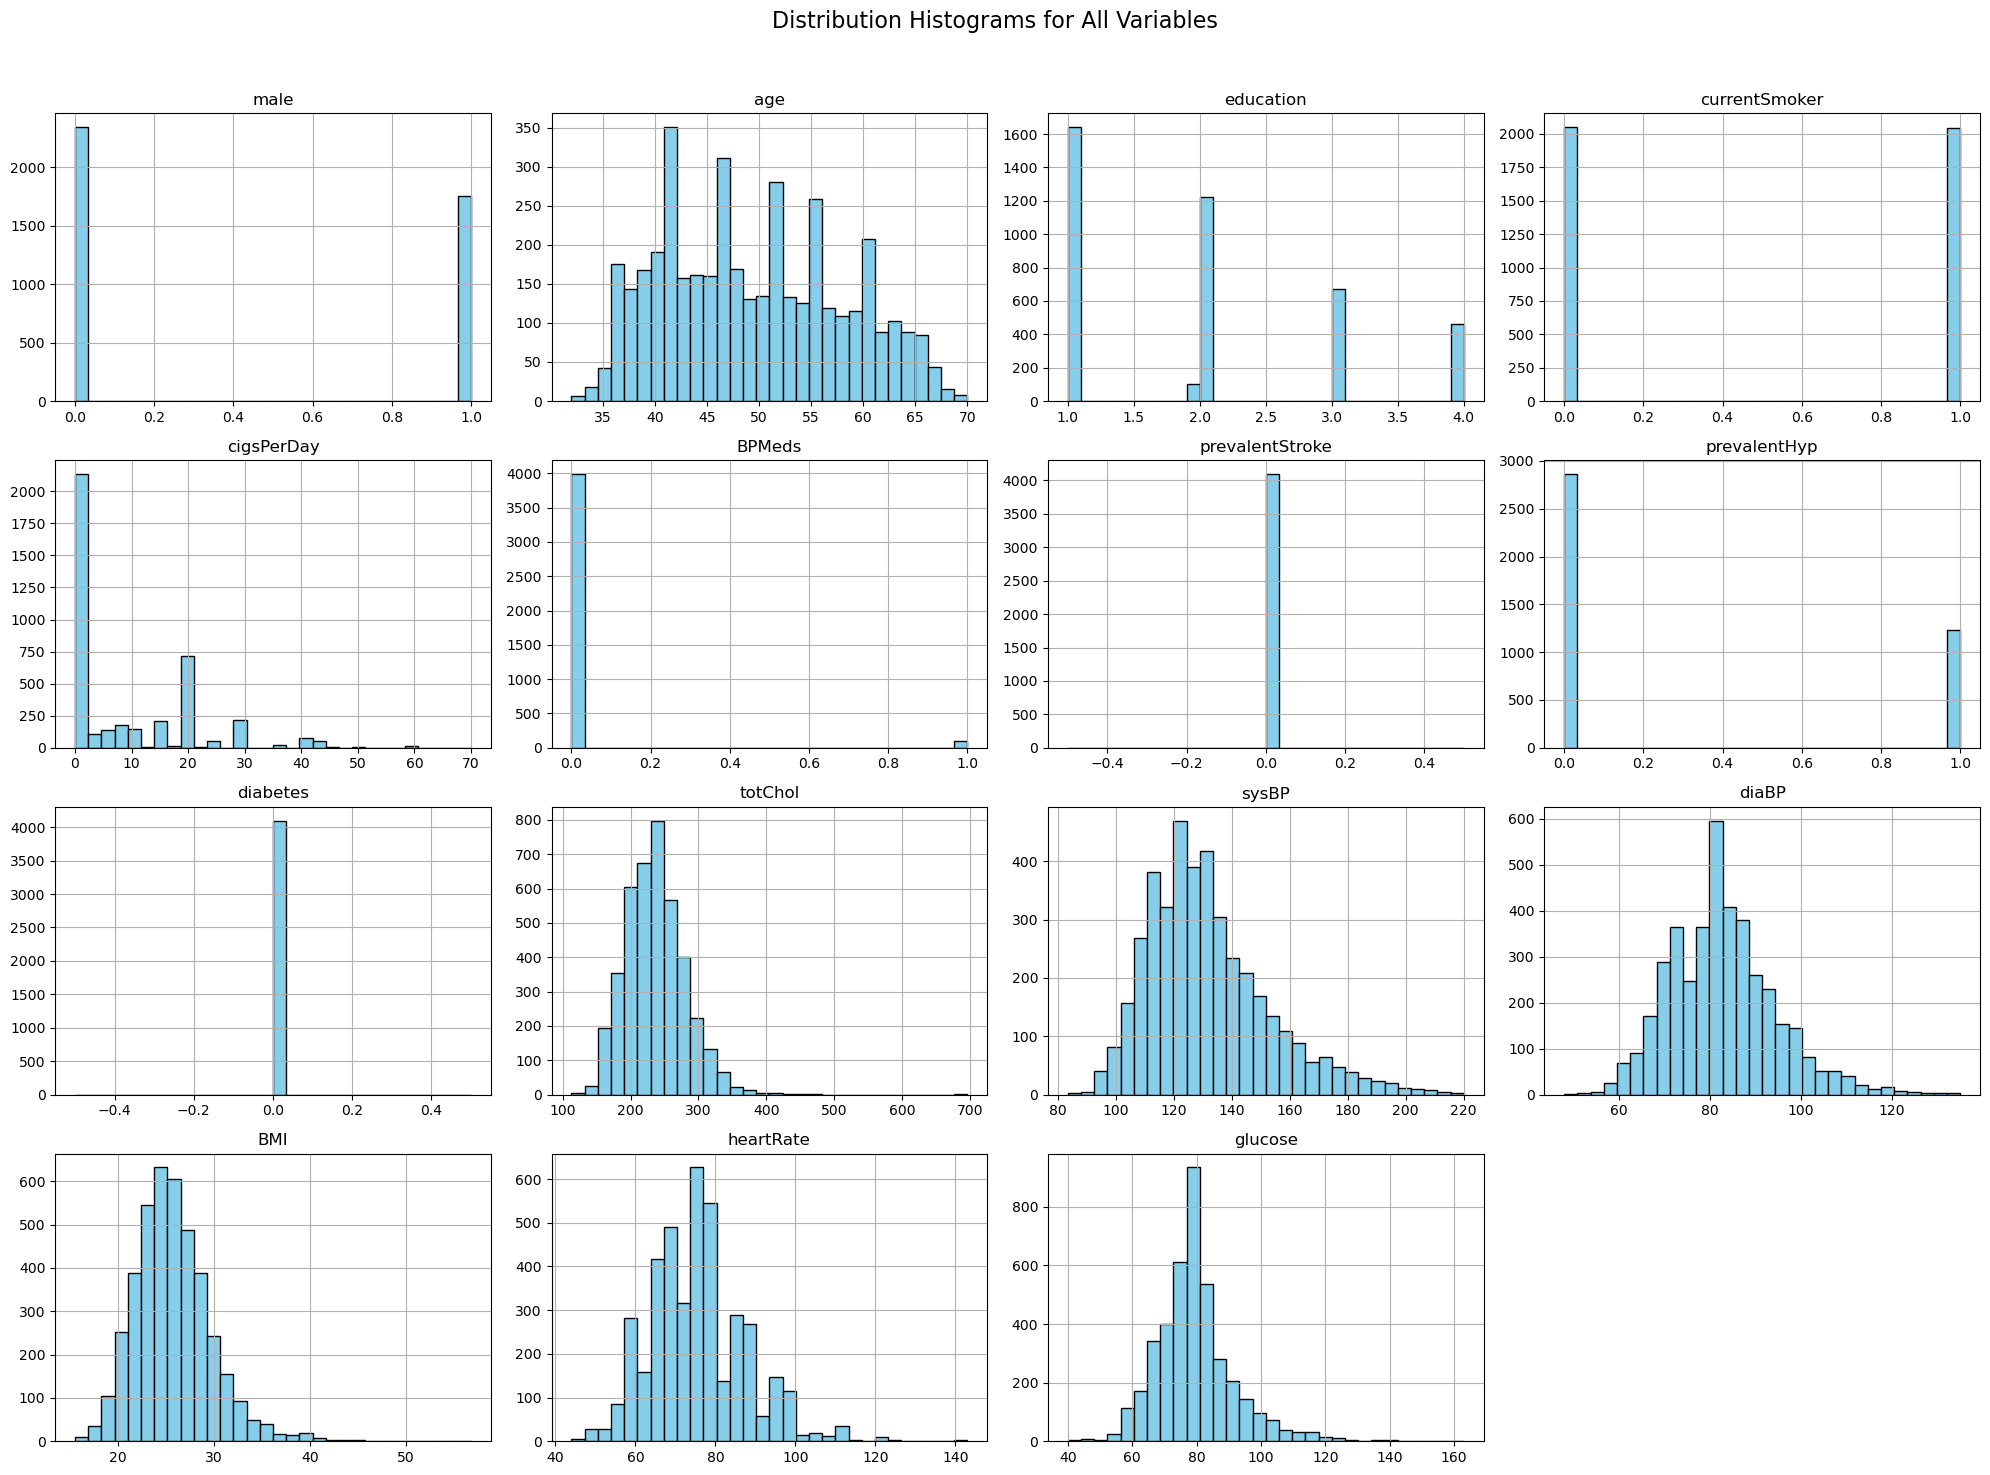

In [60]:
import matplotlib.pyplot as plt

# Plot distribution histograms for all variables
data.hist(figsize=(20, 15), bins=30, color='skyblue', edgecolor='black')
plt.suptitle('Distribution Histograms for All Variables', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [61]:
# Perform dummy coding for specified columns
columns_to_dummy = ['education', 'currentSmoker', 'prevalentHyp', 
                    'prevalentStroke', 'BPMeds', 'diabetes']

# Create dummy variables
data_dummies = pd.get_dummies(data, columns=columns_to_dummy, drop_first=True) #dtype=int)

# Keep the "age" column as it is since it's numerical and continuous
data_dummies['age'] = data['age']

# Display the first few rows of the transformed dataset
data_dummies.head()


,male,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,education_1.9894947473736868,education_2.0,education_3.0,education_4.0,currentSmoker_1,prevalentHyp_1,BPMeds_0.026166378671932857,BPMeds_1.0
0,1,39,0.0,195.0,106.0,70.0,26.97,80.0,77.0,False,False,False,True,False,False,False,False
1,0,46,0.0,250.0,121.0,81.0,28.73,95.0,76.0,False,True,False,False,False,False,False,False
2,1,48,20.0,245.0,127.5,80.0,25.34,75.0,70.0,False,False,False,False,True,False,False,False
3,0,61,30.0,225.0,150.0,95.0,28.58,65.0,103.0,False,False,True,False,True,True,False,False
4,0,46,23.0,285.0,130.0,84.0,23.10,85.0,85.0,False,False,True,False,True,False,False,False


In [62]:
# Replace the original columns in `data` with the ones from `data_dummies`, while keeping all other columns
data_updated = data.copy()
for col in data_dummies.columns:
    data_updated[col] = data_dummies[col]

# Display the first few rows of the updated dataset
data_updated.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,...,heartRate,glucose,education_1.9894947473736868,education_2.0,education_3.0,education_4.0,currentSmoker_1,prevalentHyp_1,BPMeds_0.026166378671932857,BPMeds_1.0
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,...,80.0,77.0,False,False,False,True,False,False,False,False
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,...,95.0,76.0,False,True,False,False,False,False,False,False
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,...,75.0,70.0,False,False,False,False,True,False,False,False
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,...,65.0,103.0,False,False,True,False,True,True,False,False
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,...,85.0,85.0,False,False,True,False,True,False,False,False


In [63]:
# # Transform 'cigsPerDay' into numeric categories while keeping it numeric
# 0 for 0 cigarettes per day
# 1 for 1 to 20 cigarettes per day
# 2 for more than 20 cigarettes per day

data_updated['cigsPerDay'] = data_updated['cigsPerDay'].apply(
    lambda x: 0 if x == 0 else (2 if x > 20 else 1)
)

# Verify the transformation
data_updated['cigsPerDay'].head()



0    0
1    0
2    1
3    2
4    2
Name: cigsPerDay, dtype: int64

In [64]:
# Bin the 'age' column into 10 equal-width bins
data_updated['age_bins'] = pd.cut(data_updated['age'], bins=10, labels=[f'Bin_{i+1}' for i in range(10)])

# Display the first few rows to verify the bins
data_updated[['age', 'age_bins']].head()
# Count the number of occurrences in each age bin
age_bin_counts = data_updated['age_bins'].value_counts(sort=False)


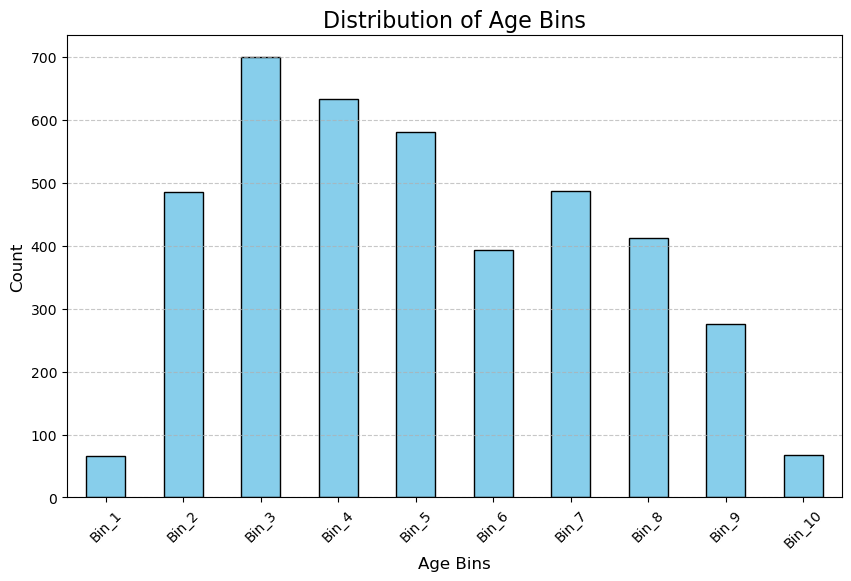

In [65]:
# Plot a bar chart for the age bins
plt.figure(figsize=(10, 6))
age_bin_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Age Bins', fontsize=16)
plt.xlabel('Age Bins', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

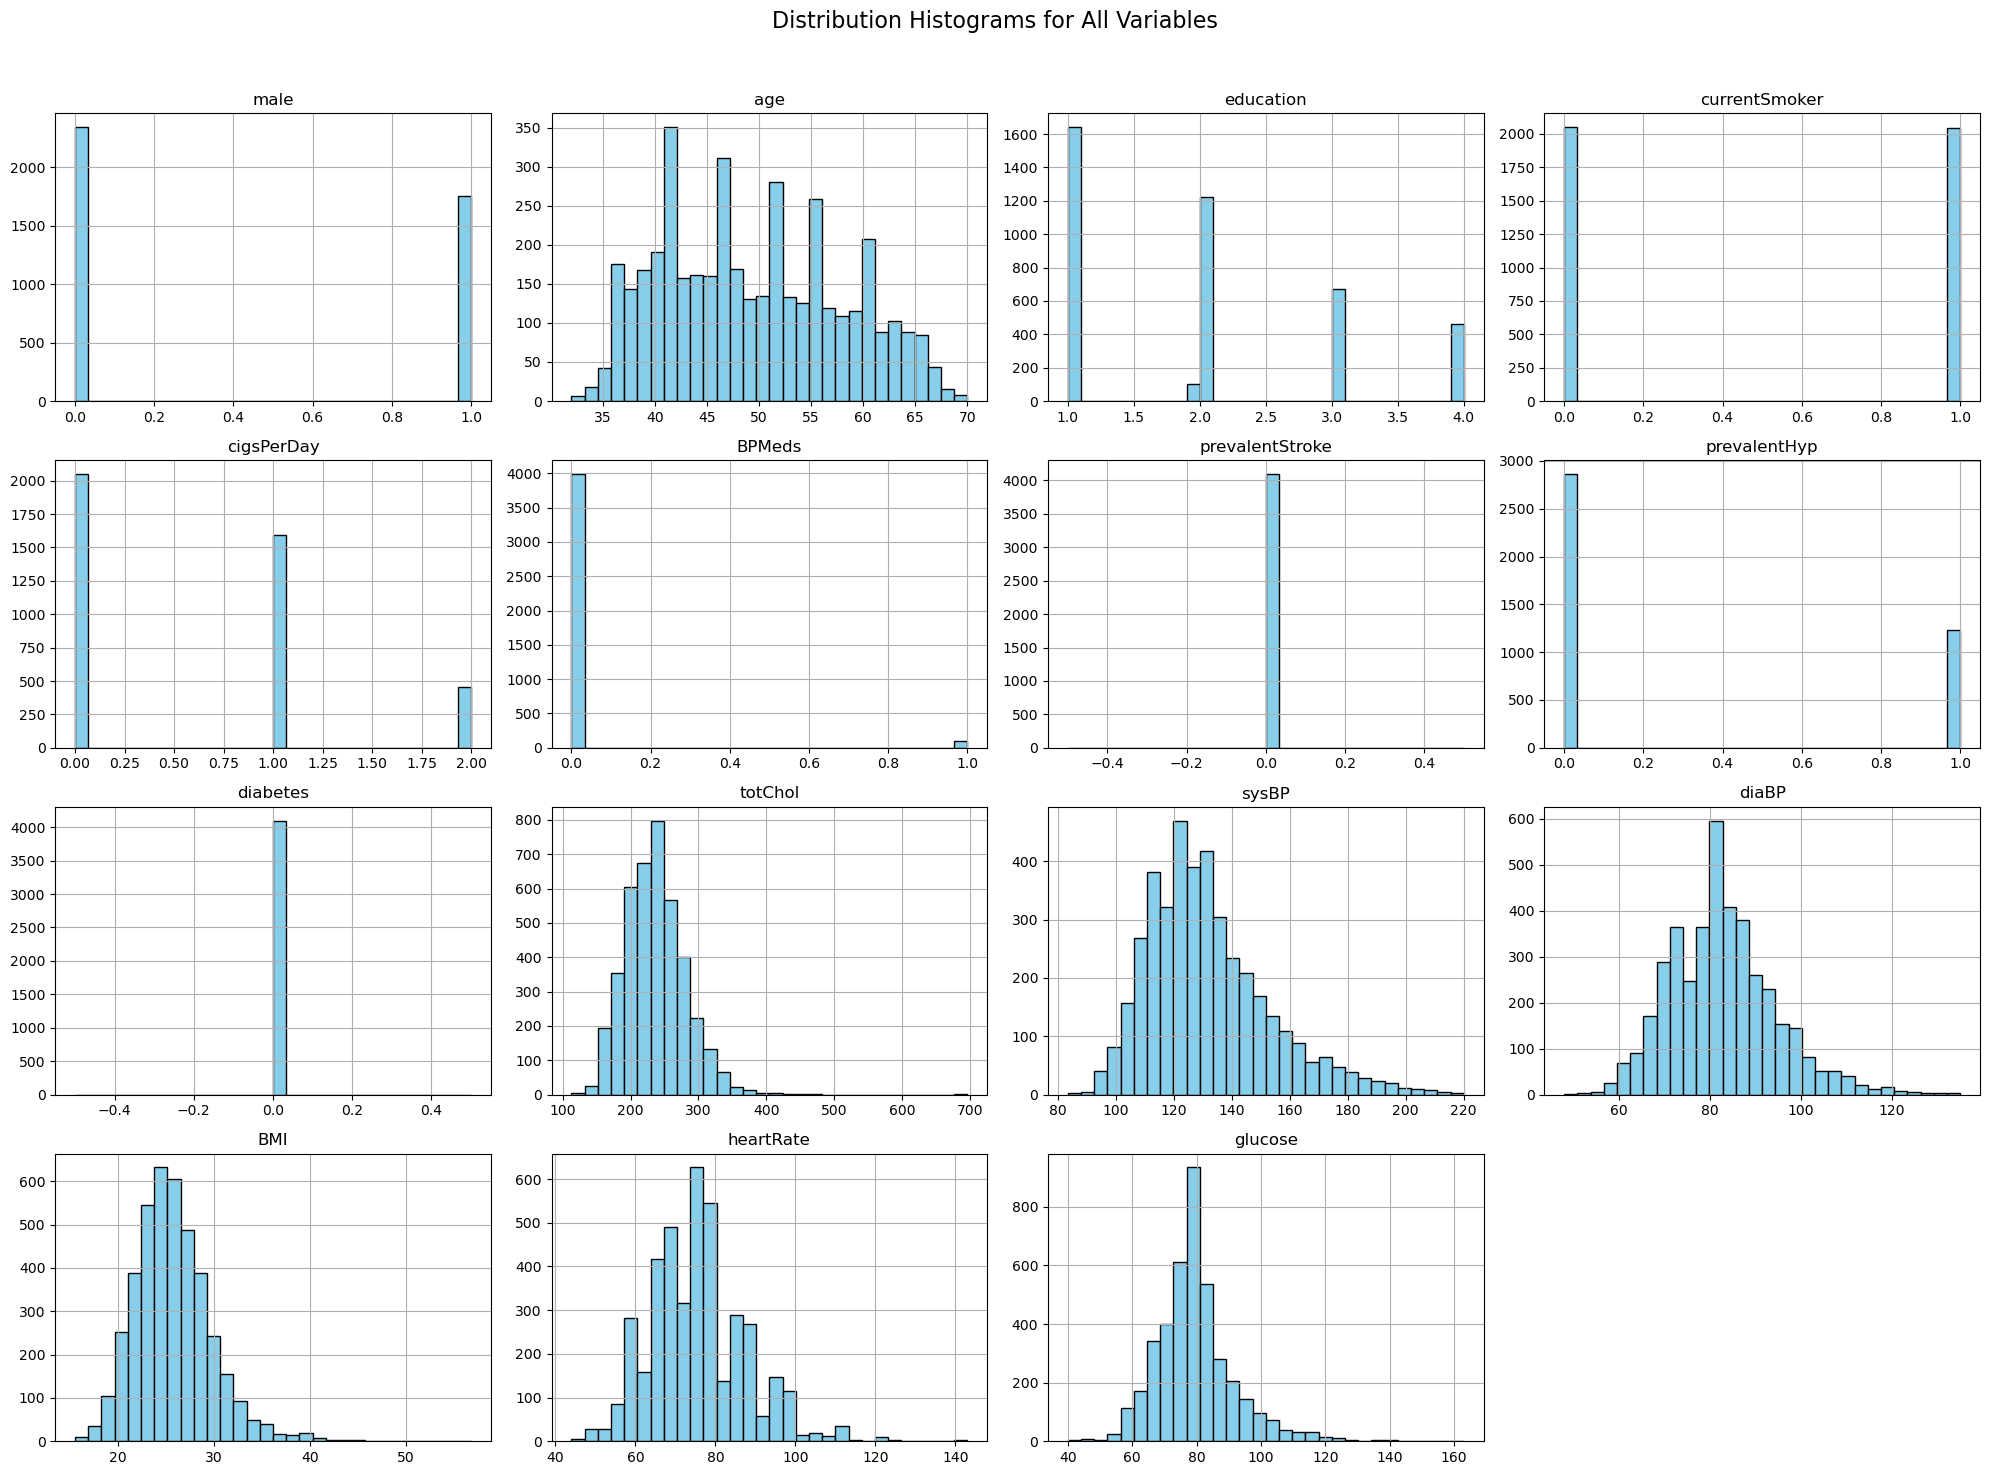

In [66]:
import matplotlib.pyplot as plt

# Plot distribution histograms for all variables
data_updated.hist(figsize=(20, 15), bins=30, color='skyblue', edgecolor='black')
plt.suptitle('Distribution Histograms for All Variables', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [67]:
# Update the original data reference to the updated dataset
data = data_updated

# Display the first few rows of the updated data to confirm
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,...,glucose,education_1.9894947473736868,education_2.0,education_3.0,education_4.0,currentSmoker_1,prevalentHyp_1,BPMeds_0.026166378671932857,BPMeds_1.0,age_bins
0,1,39,4.0,0,0,0.0,0,0,0,195.0,...,77.0,False,False,False,True,False,False,False,False,Bin_2
1,0,46,2.0,0,0,0.0,0,0,0,250.0,...,76.0,False,True,False,False,False,False,False,False,Bin_4
2,1,48,1.0,1,1,0.0,0,0,0,245.0,...,70.0,False,False,False,False,True,False,False,False,Bin_5
3,0,61,3.0,1,2,0.0,0,1,0,225.0,...,103.0,False,False,True,False,True,True,False,False,Bin_8
4,0,46,3.0,1,2,0.0,0,0,0,285.0,...,85.0,False,False,True,False,True,False,False,False,Bin_4


In [68]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Corrected: Identify numeric columns from the dataset
numeric_columns = data.select_dtypes(include=['float64','int64']).columns

# Handle missing values for numeric columns using median strategy
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(data[numeric_columns]), columns=numeric_columns)

# Combine imputed numeric columns with the non-numeric columns in the dataset
non_numeric_columns = data.select_dtypes(exclude=['float64', 'int64']).columns
data_imputed = pd.concat([X_imputed, data[non_numeric_columns].reset_index(drop=True)], axis=1)

# Update the dataset and features
data = data_imputed

# Display data types of the updated dataset
data.dtypes



male                             float64
age                              float64
education                        float64
currentSmoker                    float64
cigsPerDay                       float64
BPMeds                           float64
prevalentStroke                  float64
prevalentHyp                     float64
diabetes                         float64
totChol                          float64
sysBP                            float64
diaBP                            float64
BMI                              float64
heartRate                        float64
glucose                          float64
education_1.9894947473736868        bool
education_2.0                       bool
education_3.0                       bool
education_4.0                       bool
currentSmoker_1                     bool
prevalentHyp_1                      bool
BPMeds_0.026166378671932857         bool
BPMeds_1.0                          bool
age_bins                        category
dtype: object

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Separate target variable (BMI) and features
target = 'BMI'
X = data.drop(columns=[target])
y = data[target]


In [70]:
# Convert boolean columns to numeric if any exist
bool_columns = data.select_dtypes(include=['bool']).columns

# Convert to numeric
data[bool_columns] = data[bool_columns].astype(int)
X[bool_columns] = X[bool_columns].astype(int)

# Confirm the changes by displaying the updated data types
X.dtypes



male                             float64
age                              float64
education                        float64
currentSmoker                    float64
cigsPerDay                       float64
BPMeds                           float64
prevalentStroke                  float64
prevalentHyp                     float64
diabetes                         float64
totChol                          float64
sysBP                            float64
diaBP                            float64
heartRate                        float64
glucose                          float64
education_1.9894947473736868       int64
education_2.0                      int64
education_3.0                      int64
education_4.0                      int64
currentSmoker_1                    int64
prevalentHyp_1                     int64
BPMeds_0.026166378671932857        int64
BPMeds_1.0                         int64
age_bins                        category
dtype: object

In [71]:
# Convert the 'age_bins' categorical column to numeric intervals
data['age_bins_numeric'] = data['age_bins'].cat.codes

# Drop the original 'age_bins' column if not needed
data = data.drop(columns=['age_bins'])

# Verify the changes
data[['age', 'age_bins_numeric']].head()


,age,age_bins_numeric
0,39.0,1
1,46.0,3
2,48.0,4
3,61.0,7
4,46.0,3


In [72]:
dropout = 'age'
X = data.drop(columns=[dropout])


In [73]:
X.describe()

,male,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,...,glucose,education_1.9894947473736868,education_2.0,education_3.0,education_4.0,currentSmoker_1,prevalentHyp_1,BPMeds_0.026166378671932857,BPMeds_1.0,age_bins_numeric
count,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.0,4100.000000,4100.0,4100.000000,4100.000000,...,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000
mean,0.428537,1.989495,0.499512,0.610000,0.026166,0.0,0.300976,0.0,236.392249,131.671341,...,79.456820,0.024878,0.297561,0.163902,0.113171,0.499512,0.300976,0.011951,0.025854,4.070488
std,0.494927,1.008570,0.500061,0.677486,0.158692,0.0,0.458738,0.0,43.898705,21.115823,...,12.274115,0.155772,0.457241,0.370232,0.316840,0.500061,0.458738,0.108680,0.158718,2.262297
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,113.000000,83.500000,...,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,206.000000,117.000000,...,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,234.000000,128.000000,...,79.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,1.000000,3.000000,1.000000,1.000000,0.000000,0.0,1.000000,0.0,262.000000,142.500000,...,85.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,6.000000
max,1.000000,4.000000,1.000000,2.000000,1.000000,0.0,1.000000,0.0,696.000000,220.000000,...,163.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000


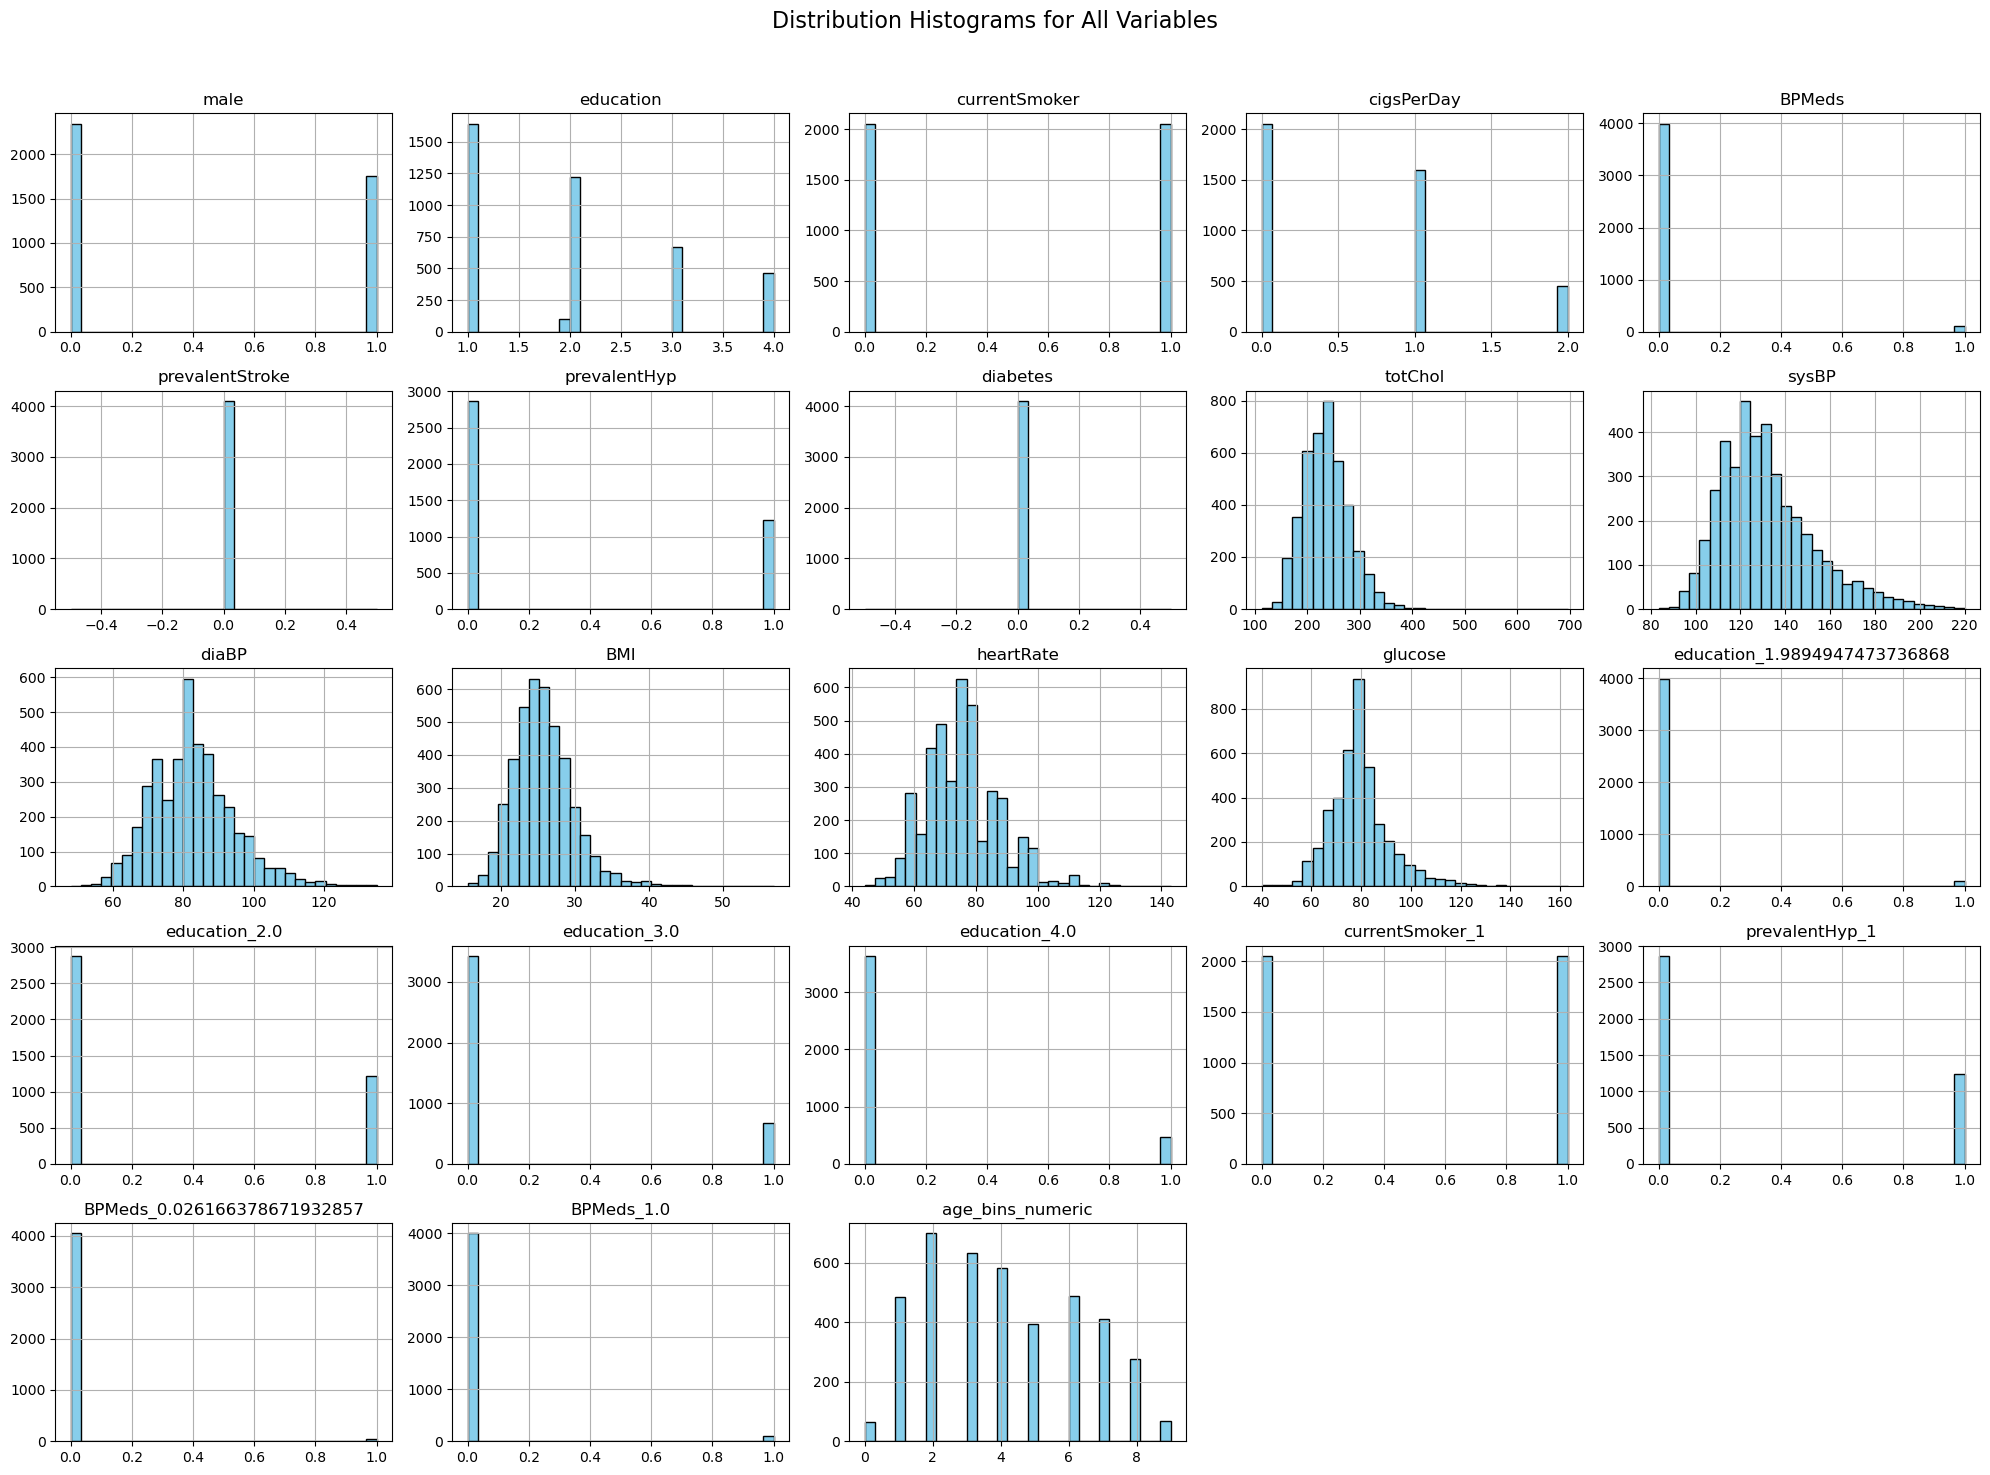

In [74]:
import matplotlib.pyplot as plt

# Plot distribution histograms for all variables
X.hist(figsize=(20, 15), bins=30, color='skyblue', edgecolor='black')
plt.suptitle('Distribution Histograms for All Variables', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd

# Ensure X contains only numeric columns
X_numeric = X.select_dtypes(include=['float64', 'int64', 'int32', 'uint8'])

# Standard Scaling
standard_scaler = StandardScaler()
X_standard_scaled = pd.DataFrame(
    standard_scaler.fit_transform(X_numeric), columns=X_numeric.columns
)

# Min-Max Scaling
minmax_scaler = MinMaxScaler()
X_minmax_scaled = pd.DataFrame(
    minmax_scaler.fit_transform(X_numeric), columns=X_numeric.columns
)

# Display results for comparison
X_standard_scaled.head(), X_minmax_scaled.head()


(       male  education  currentSmoker  cigsPerDay    BPMeds  prevalentStroke  \
 0  1.154783   1.993665      -0.999025   -0.900497 -0.164907              0.0   
 1 -0.865964   0.010417      -0.999025   -0.900497 -0.164907              0.0   
 2  1.154783  -0.981206       1.000976    0.575728 -0.164907              0.0   
 3 -0.865964   1.002041       1.000976    2.051953 -0.164907              0.0   
 4 -0.865964   1.002041       1.000976    2.051953 -0.164907              0.0   
 
    prevalentHyp  diabetes   totChol     sysBP  ...  heartRate   glucose  \
 0     -0.656175       0.0 -0.943019 -1.215888  ...   0.351099 -0.200187   
 1     -0.656175       0.0  0.310019 -0.505433  ...   1.600363 -0.281669   
 2     -0.656175       0.0  0.196106 -0.197570  ...  -0.065323 -0.770563   
 3      1.523984       0.0 -0.259544  0.868112  ...  -0.898166  1.918350   
 4     -0.656175       0.0  1.107406 -0.079161  ...   0.767520  0.451671   
 
    education_1.9894947473736868  education_2.0  educa

In [82]:


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_minmax_scaled, y, test_size=0.2, random_state=42)

# Display processed data information
X_train.head(), y_train.head()


(      male  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
 1429   1.0   0.000000            1.0         1.0     0.0              0.0   
 67     1.0   0.666667            1.0         0.5     0.0              0.0   
 1703   0.0   0.000000            0.0         0.0     0.0              0.0   
 3819   0.0   0.333333            0.0         0.0     0.0              0.0   
 221    1.0   0.000000            1.0         1.0     0.0              0.0   
 
       prevalentHyp  diabetes   totChol     sysBP  ...  heartRate   glucose  \
 1429           1.0       0.0  0.389365  0.369963  ...   0.414141  0.373984   
 67             0.0       0.0  0.106346  0.238095  ...   0.191919  0.447154   
 1703           0.0       0.0  0.211651  0.340659  ...   0.363636  0.320787   
 3819           1.0       0.0  0.234991  0.505495  ...   0.313131  0.439024   
 221            0.0       0.0  0.222985  0.377289  ...   0.464646  0.203252   
 
       education_1.9894947473736868  education_2.0  ed

In [92]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Define the model
model = ElasticNet()

# Define the parameter grid
param_grid = {'alpha': [0.001, 0.005, 0.01, 0.1, 1.0, 10.0], 'l1_ratio': [0.2, 0.5, 0.8, 0.9, 0.85, 0.95, 0.99, 1]}

# Set up the Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'alpha': 0.001, 'l1_ratio': 1}


In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {"MSE": mse, "MAE": mae, "RMSE": rmse, "R2": r2}
    
# Define parameter grids for each model
ridge_params = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
lasso_params = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
elastic_net_params = {'alpha': [0.01, 0.1, 1.0, 10.0], 'l1_ratio': [0.2, 0.5, 0.8]}

# Initialize GridSearchCV for each model
ridge_grid = GridSearchCV(Ridge(random_state=42), ridge_params, scoring='r2', cv=5)
lasso_grid = GridSearchCV(Lasso(random_state=42), lasso_params, scoring='r2', cv=5)
elastic_net_grid = GridSearchCV(ElasticNet(random_state=42), elastic_net_params, scoring='r2', cv=5)

# Perform hyperparameter tuning
ridge_grid.fit(X_train, y_train)
lasso_grid.fit(X_train, y_train)
elastic_net_grid.fit(X_train, y_train)

# Best models
best_ridge = ridge_grid.best_estimator_
best_lasso = lasso_grid.best_estimator_
best_elastic_net = elastic_net_grid.best_estimator_

# Retrain on the full training data with the best hyperparameters
best_ridge.fit(X_train, y_train)
best_lasso.fit(X_train, y_train)
best_elastic_net.fit(X_train, y_train)

# Make predictions
ridge_preds = best_ridge.predict(X_test)
lasso_preds = best_lasso.predict(X_test)
elastic_net_preds = best_elastic_net.predict(X_test)

# Evaluate the tuned models
ridge_metrics = calculate_metrics(y_test, ridge_preds)
lasso_metrics = calculate_metrics(y_test, lasso_preds)
elastic_net_metrics = calculate_metrics(y_test, elastic_net_preds)

ridge_metrics, lasso_metrics, elastic_net_metrics

# Retrieve the best alpha values for each model
best_ridge_alpha = best_ridge.alpha
best_lasso_alpha = best_lasso.alpha
best_elastic_net_alpha = best_elastic_net.alpha
best_elastic_net_l1_ratio = best_elastic_net.l1_ratio

ridge_metrics, lasso_metrics, elastic_net_metrics



({'MSE': 1.975470564449248e-06,
  'MAE': 0.0010606048941745752,
  'RMSE': 0.0014055143416021225,
  'R2': 0.9999998693160355},
 {'MSE': 0.010126773415027362,
  'MAE': 0.07656988661954603,
  'RMSE': 0.10063187077177568,
  'R2': 0.9993300801731997},
 {'MSE': 0.6067504771463098,
  'MAE': 0.587983768689153,
  'RMSE': 0.7789418958730554,
  'R2': 0.9598614328668916})

In [78]:
# Retrieve the best alpha values for each model
best_ridge_alpha = best_ridge.alpha
best_lasso_alpha = best_lasso.alpha
best_elastic_net_alpha = best_elastic_net.alpha
best_elastic_net_l1_ratio = best_elastic_net.l1_ratio

# Combine results
alpha_results = {
    "Ridge": {"Alpha": best_ridge_alpha},
    "Lasso": {"Alpha": best_lasso_alpha},
    "ElasticNet": {"Alpha": best_elastic_net_alpha, "L1 Ratio": best_elastic_net_l1_ratio}
}

alpha_results


{'Ridge': {'Alpha': 0.01},
 'Lasso': {'Alpha': 0.01},
 'ElasticNet': {'Alpha': 0.01, 'L1 Ratio': 0.8}}

In [79]:
# WIth K-Fold Validation
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict

# Set up k-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform k-fold validation and evaluate metrics for Ridge, Lasso, and ElasticNet
def k_fold_validation(model, X, y, cv):
    mse = -cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv).mean()
    mae = -cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv).mean()
    r2 = cross_val_score(model, X, y, scoring='r2', cv=cv).mean()
    rmse = np.sqrt(mse)
    return {"MSE": mse, "MAE": mae, "RMSE": rmse, "R2": r2}

# Ridge
ridge_kfold_metrics = k_fold_validation(Ridge(alpha=0.01, random_state=42), X_minmax_scaled, y, kf)

# Lasso
lasso_kfold_metrics = k_fold_validation(Lasso(alpha=0.01, random_state=42), X_minmax_scaled, y, kf)

# ElasticNet
elastic_net_kfold_metrics = k_fold_validation(ElasticNet(alpha=0.01, l1_ratio=0.8, random_state=42), X_minmax_scaled, y, kf)

ridge_kfold_metrics, lasso_kfold_metrics, elastic_net_kfold_metrics


({'MSE': 1.6671368982177357e-06,
  'MAE': 0.000975762860392682,
  'RMSE': 0.0012911765557884543,
  'R2': 0.9999998947877377},
 {'MSE': 0.010852320599125595,
  'MAE': 0.07949748411235424,
  'RMSE': 0.10417447191671093,
  'R2': 0.9993147497151378},
 {'MSE': 0.6426081565155086,
  'MAE': 0.6063163110638163,
  'RMSE': 0.8016284404357849,
  'R2': 0.959425032911082})

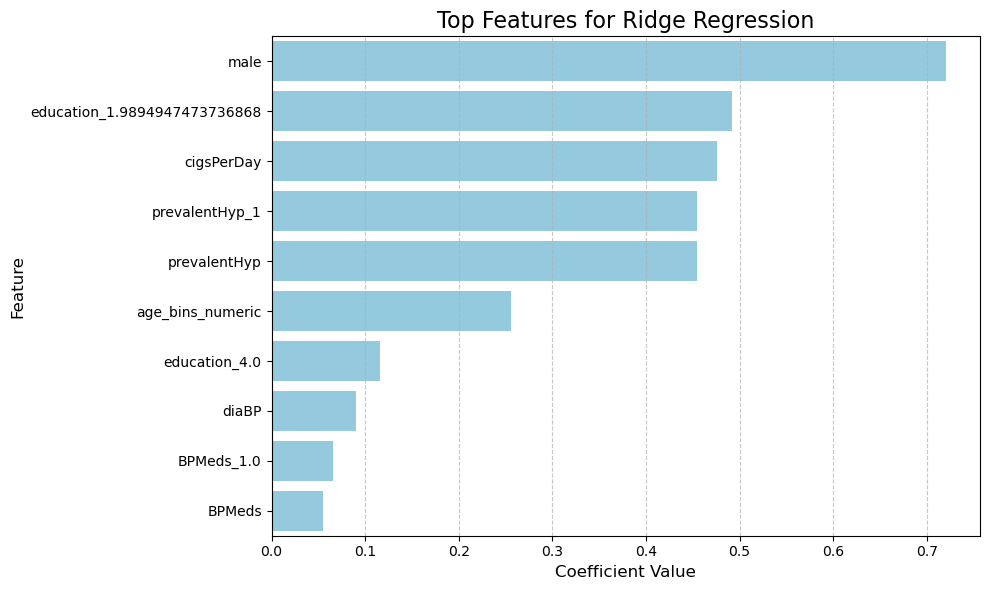

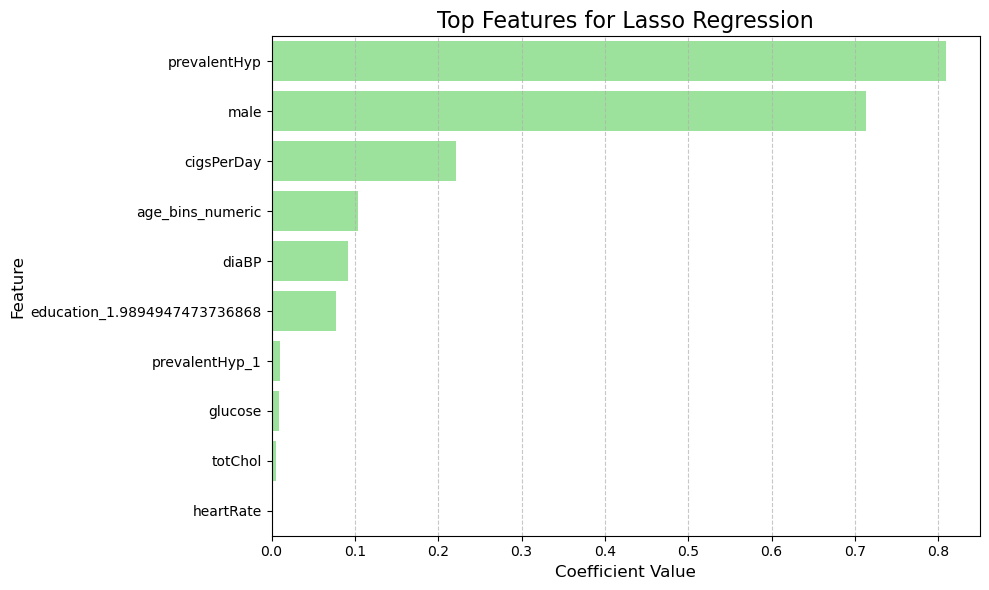

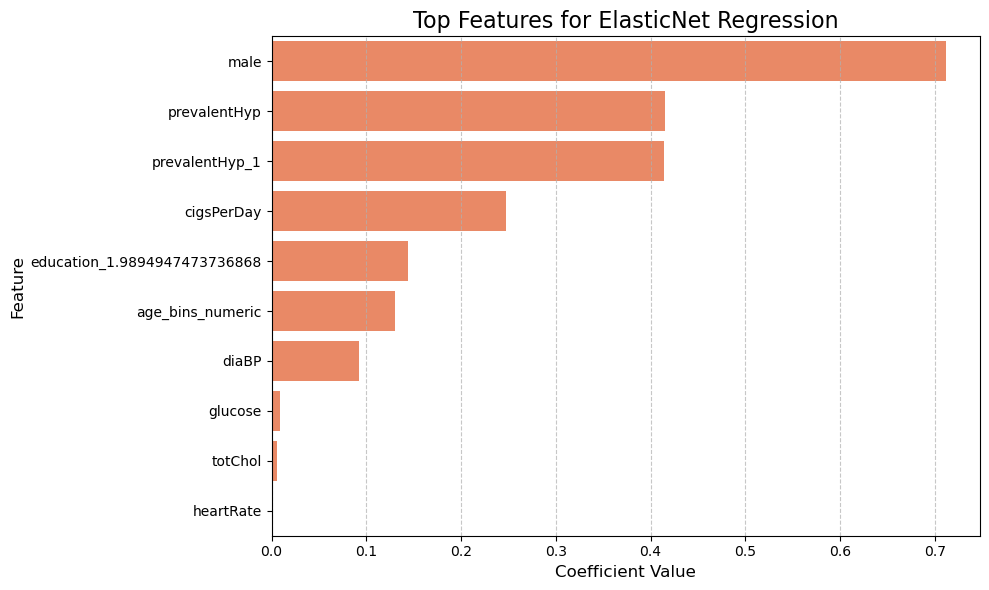

In [80]:
# Define the function to plot top features
import seaborn as sns

def plot_top_features(features_series, title, color):
    """
    Plots the top features from a regression model based on coefficients.
    
    Args:
        features_series (pd.Series): Series containing feature names as index and coefficients as values.
        title (str): Title for the plot.
        color (str): Color for the bars in the plot.
    """
    plt.figure(figsize=(10, 6))
    top_features = features_series[features_series != 0].nlargest(10)
    sns.barplot(x=top_features.values, y=top_features.index, color=color)
    plt.title(f"Top Features for {title}", fontsize=16)
    plt.xlabel("Coefficient Value", fontsize=12)
    plt.ylabel("Feature", fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
# Drop 'BMI' column from features
X_features = data.drop(columns=['BMI'])

# Fit the regression models again to get coefficients
best_ridge.fit(X_features, data['BMI'])
best_lasso.fit(X_features, data['BMI'])
best_elastic_net.fit(X_features, data['BMI'])

# Get coefficients
best_ridge_coefficients = best_ridge.coef_
best_lasso_coefficients = best_lasso.coef_
best_elastic_net_coefficients = best_elastic_net.coef_

# Convert coefficients to pandas Series
best_ridge_features = pd.Series(best_ridge_coefficients, index=X_features.columns).sort_values(ascending=False)
best_lasso_features = pd.Series(best_lasso_coefficients, index=X_features.columns).sort_values(ascending=False)
best_elastic_net_features = pd.Series(best_elastic_net_coefficients, index=X_features.columns).sort_values(ascending=False)

# Plot the top features for each regression model
plot_top_features(best_ridge_features, "Ridge Regression", color="skyblue")
plot_top_features(best_lasso_features, "Lasso Regression", color="lightgreen")
plot_top_features(best_elastic_net_features, "ElasticNet Regression", color="coral")


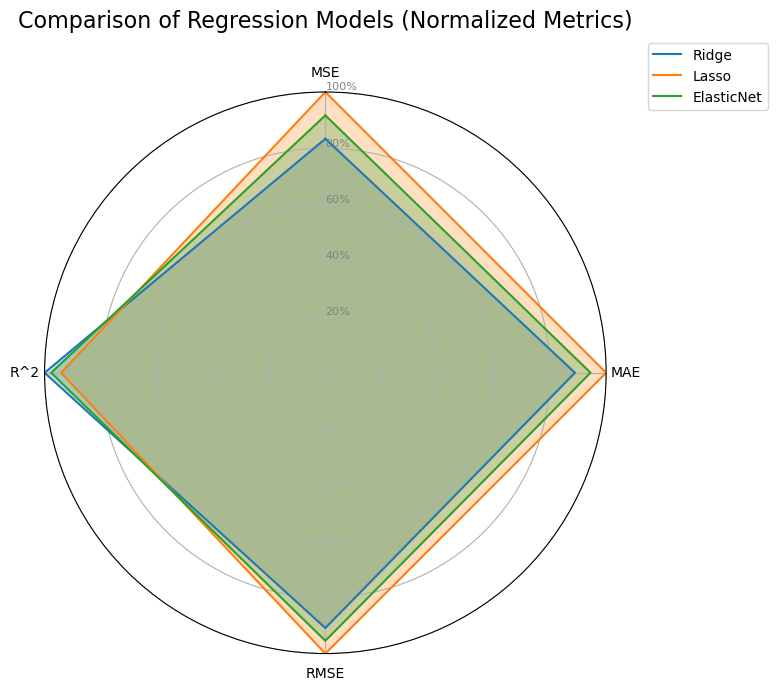

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Example metrics for Ridge, Lasso, and ElasticNet
# Replace these with actual calculated values
metrics = {
    "Ridge": {"MSE": 100, "MAE": 8, "RMSE": 10, "R^2": 0.85},
    "Lasso": {"MSE": 120, "MAE": 9, "RMSE": 11, "R^2": 0.80},
    "ElasticNet": {"MSE": 110, "MAE": 8.5, "RMSE": 10.5, "R^2": 0.83}
}

# Prepare data for the spider chart
categories = list(metrics["Ridge"].keys())
models = metrics.keys()

# Normalize metrics for better visual comparison
normalized_metrics = {}
for model, values in metrics.items():
    normalized_metrics[model] = [values[metric] / max([metrics[m][metric] for m in models]) for metric in categories]

# Create the spider chart
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  # Close the circle

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for model, values in normalized_metrics.items():
    data = values + values[:1]  # Close the circle
    ax.plot(angles, data, label=model)
    ax.fill(angles, data, alpha=0.25)

# Add category labels to the chart
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["20%", "40%", "60%", "80%", "100%"], color="grey", size=8)
plt.ylim(0, 1)

# Add legend and title
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
plt.title("Comparison of Regression Models (Normalized Metrics)", size=16, y=1.1)
plt.tight_layout()

plt.show()

In [33]:
# Assuming ridge_metrics, lasso_metrics, and elastic_net_metrics are dictionaries with metrics

# Combine the metrics into a single DataFrame
metrics_combined = pd.DataFrame({
    "Ridge": ridge_metrics,
    "Lasso": lasso_metrics,
    "ElasticNet": elastic_net_metrics
}).T  # Transpose to align models as rows

# Rename index and columns for better readability
metrics_combined.index.name = "Model"
metrics_combined.columns = ["MSE", "MAE", "RMSE", "R^2"]

# Display the metrics as a simple table
print(metrics_combined)

                 MSE       MAE      RMSE       R^2
Model                                             
Ridge       0.000002  0.001061  0.001406  1.000000
Lasso       0.010127  0.076570  0.100632  0.999330
ElasticNet  0.606750  0.587984  0.778942  0.959861
